<h1><center>Travel Package Purchase Prediction Analysis</center></h1>

## Problem Statement

* Tourism is one of the most rapidly growing global industries and tourism forecasting is
becoming an increasingly important activity in planning and managing the industry.
* Because of high fluctuations of tourism demand, accurate predictions of purchase of
travel packages are of high importance for tourism organizations.
* This tourism company, wants to build a viable business model that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. 

* One of the ways to expand the customer base is to introduce a new offering of packages.

* Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe and King. Looking at the data of the last year, They observed that 18% of the customers purchased the packages.

* However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

* The company is now planning to launch a **New Product**. New Product is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.



## Objective:

To harness the available data of existing and potential customers to make the marketing expenditure more efficient and to predict which customer is more likely to purchase the newly introduced travel package.


<h3>Tasks to Solve :</h3>

- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.


### Customer details:
1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

<h1>Required Libraries</h1>

In [35]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
# load the file using excel. There are two sheets in the excel. Load the Tourism sheet
df = pd.read_csv("/config/workspace/tour_package.csv")

# back up data to preserve the initial version for reference
df_back = df.copy()

## Understanding the data

### Checking the shape of data

In [4]:
# print the data set information as number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 4888 rows and 20 columns.


### Check the dataset information

In [5]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Checking the sample data

In [6]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


**Observations:**

1. {TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation}----------
     are object type columns but contain categorical information. NEED TO convert these columns to Category type.
2. {PreferredPropertyStar, NumberOfChildrenVisiting, NumberOfPersonVisiting, PitchSatisfactionScore, NumberOfFollowups, OwnCar, Passport, CityTier and ProdTaken}--------------
     are numerical columns but contain categorical information. NEED TO covert these columns to Category type.

#### Duplicates

In [7]:

print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 4888 rows
There is now 20 columns


## Data Preprocessing

### Categorical columns

#### having value in string

In [8]:
categorical_df = pd.DataFrame()
for col in df.select_dtypes(include=['object']):
    categorical_df[col] = df[col]

for col in categorical_df:
    print(f'{col :-<50} {df[col].unique()}')

TypeofContact------------------------------------- ['Self Enquiry' 'Company Invited' nan]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male' 'Fe Male']
ProductPitched------------------------------------ ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus------------------------------------- ['Single' 'Divorced' 'Married' 'Unmarried']
Designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


#### having value in number

In [24]:
num_categorical_df = pd.DataFrame()
numeric_df = pd.DataFrame()
for col in df.select_dtypes(include=['int64', 'float64']):
    if len(df[col].unique()) > 10:
        numeric_df[col] = df[col]
        continue
    num_categorical_df[col] = df[col]

for col in num_categorical_df:
    if len(df[col].unique()) >10:
        
        continue
    print(f'{col :-<40} {df[col].unique()}')

ProdTaken------------------------------- [1 0]
CityTier-------------------------------- [3 1 2]
NumberOfPersonVisiting------------------ [3 2 1 4 5]
NumberOfFollowups----------------------- [ 3.  4.  2.  5. nan  1.  6.]
PreferredPropertyStar------------------- [ 3.  4.  5. nan]
Passport-------------------------------- [1 0]
PitchSatisfactionScore------------------ [2 3 5 4 1]
OwnCar---------------------------------- [1 0]
NumberOfChildrenVisiting---------------- [ 0.  2.  1. nan  3.]


In [25]:
num_categorical_df.columns

Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [21]:
categorical_df.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

## numerical columns

In [27]:
numeric_df.columns

Index(['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips',
       'MonthlyIncome'],
      dtype='object')

In [28]:
numeric_df

,CustomerID,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
0,200000,41.0,6.0,1.0,20993.0
1,200001,49.0,14.0,2.0,20130.0
2,200002,37.0,8.0,7.0,17090.0
3,200003,33.0,9.0,2.0,17909.0
4,200004,NaN,8.0,1.0,18468.0
...,...,...,...,...,...
4883,204883,49.0,9.0,2.0,26576.0
4884,204884,28.0,31.0,3.0,21212.0
4885,204885,52.0,17.0,7.0,31820.0
4886,204886,19.0,16.0,3.0,20289.0


### Analysing freatures and target

#### Dropped CustomerID

In [29]:
data = df.copy()
target = pd.DataFrame()
target['ProdTaken'] = data['ProdTaken'].map({0:'Not Taken',1:'Taken'})
data = data.drop(['CustomerID','ProdTaken'],axis=1)
data.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


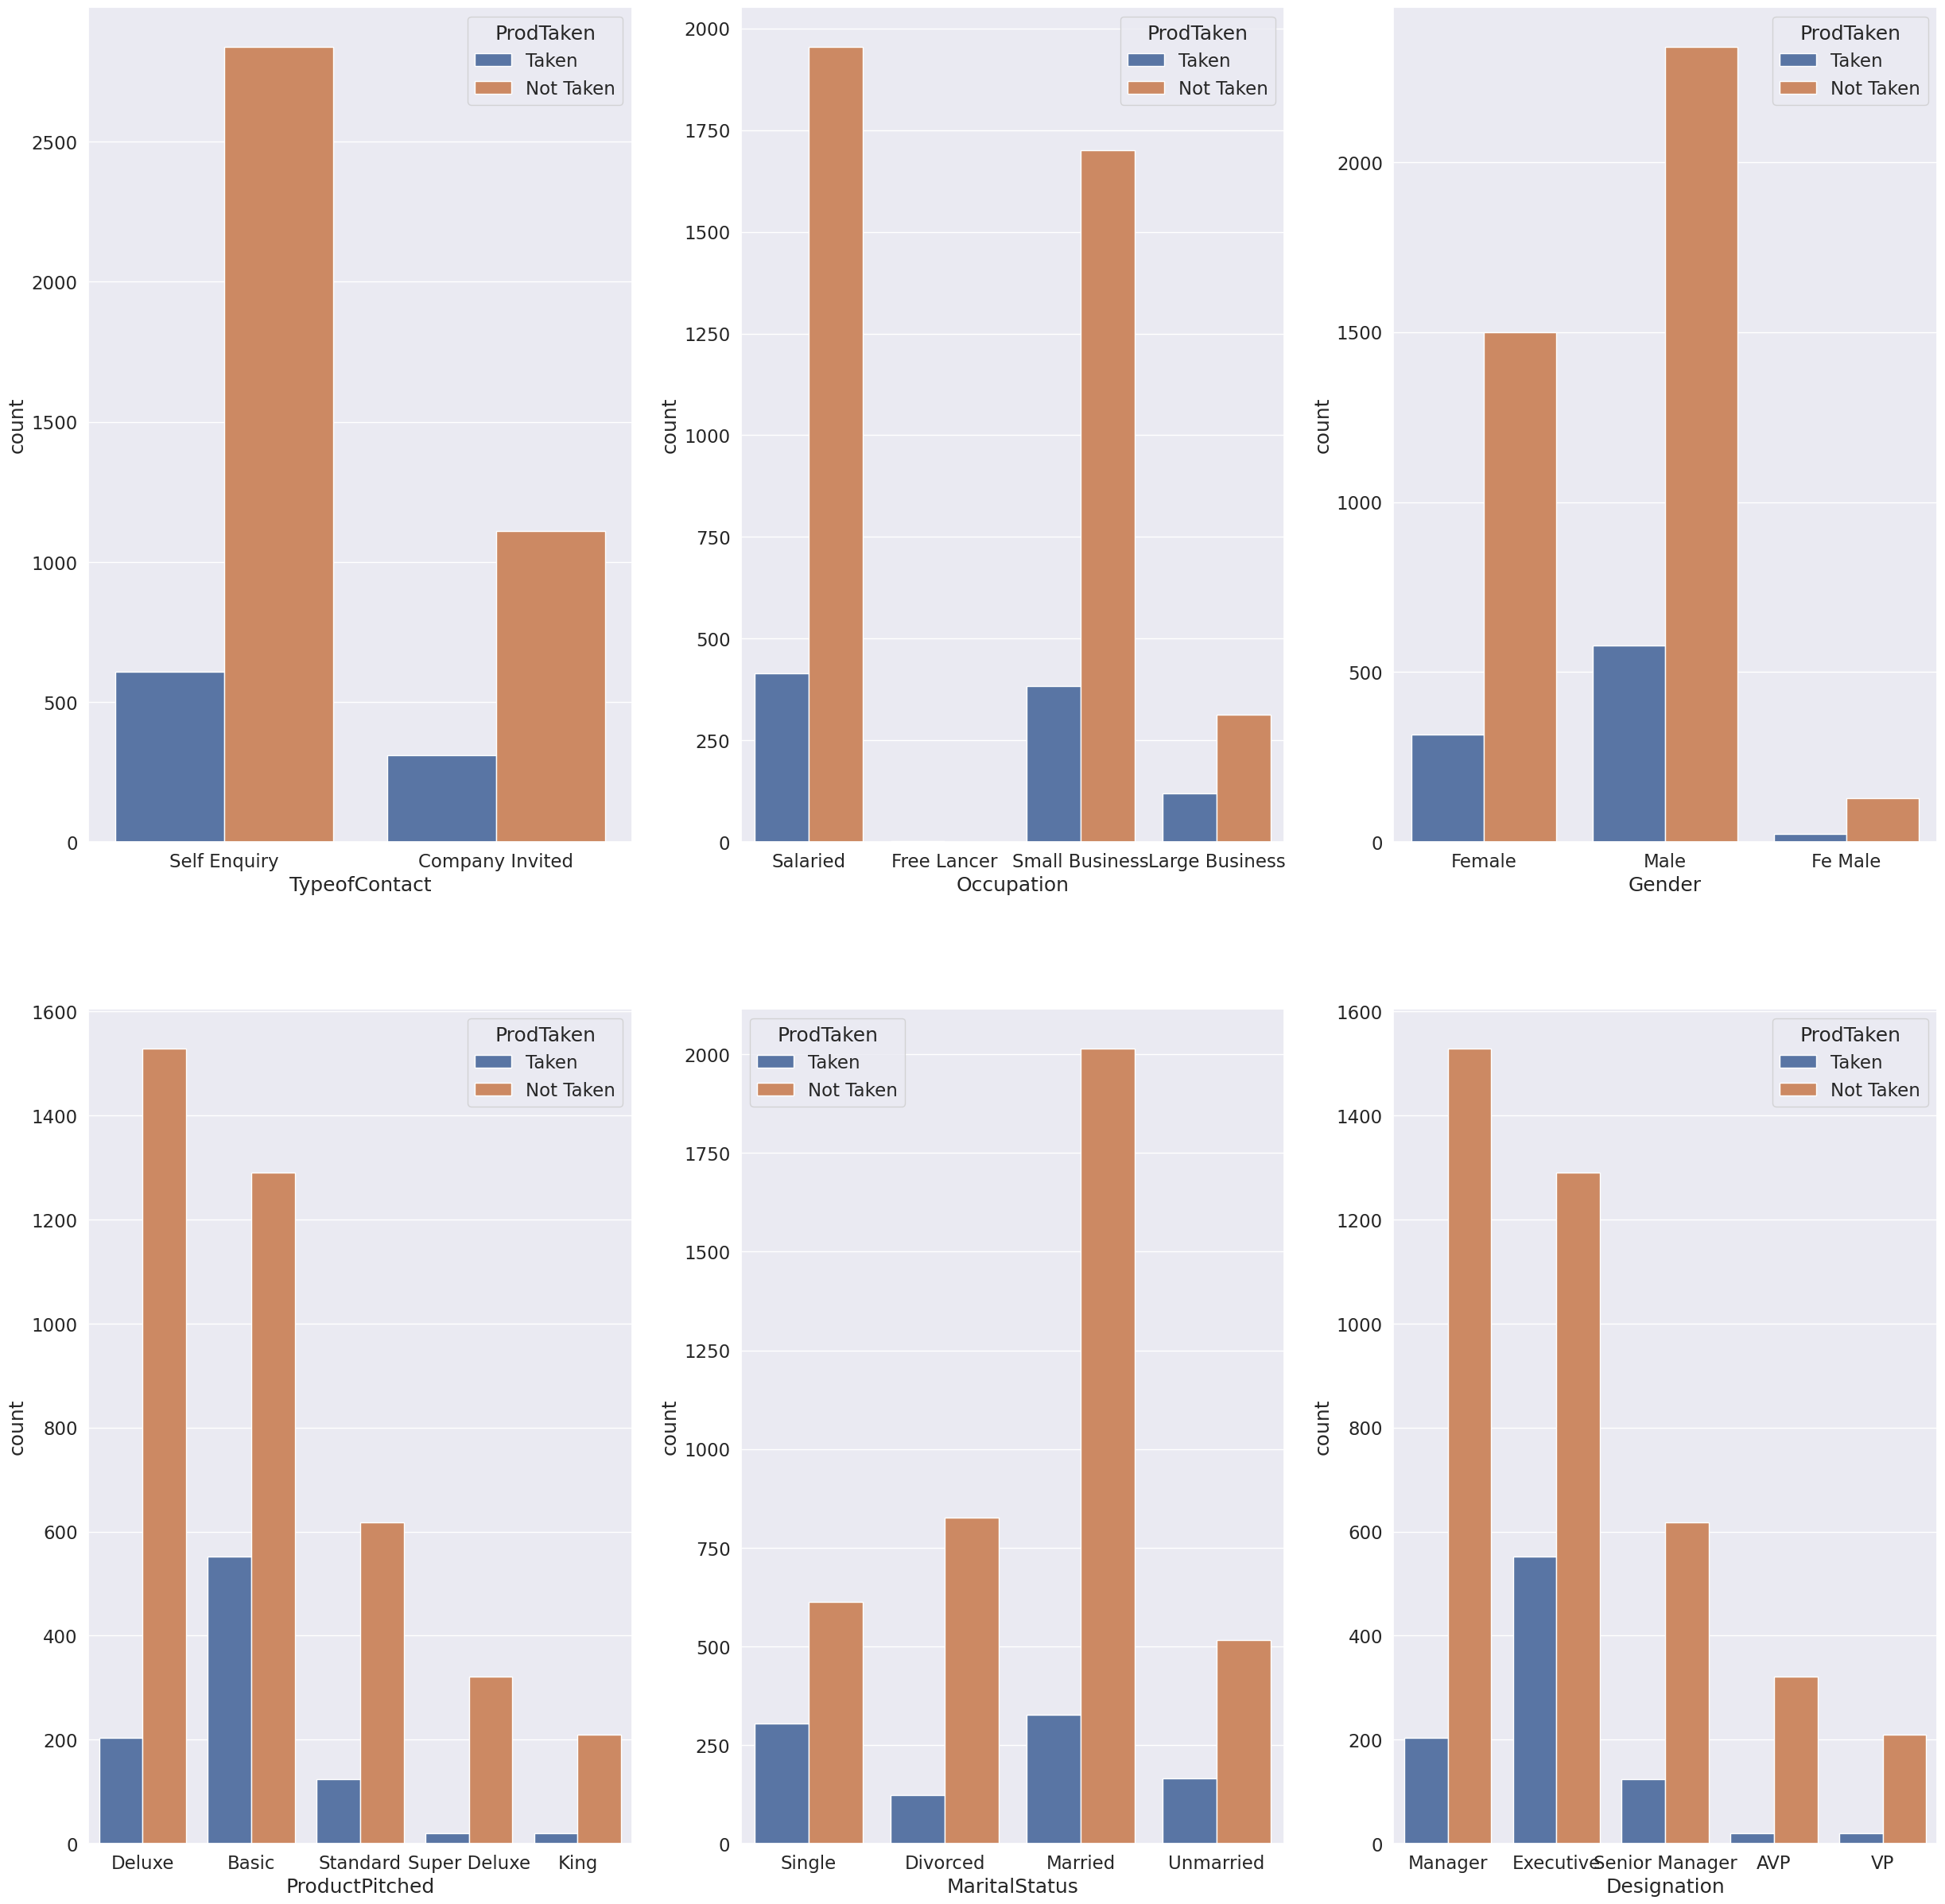

In [38]:
fig, ax = plt.subplots(2,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in categorical_df: 
    sns.countplot(x=categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

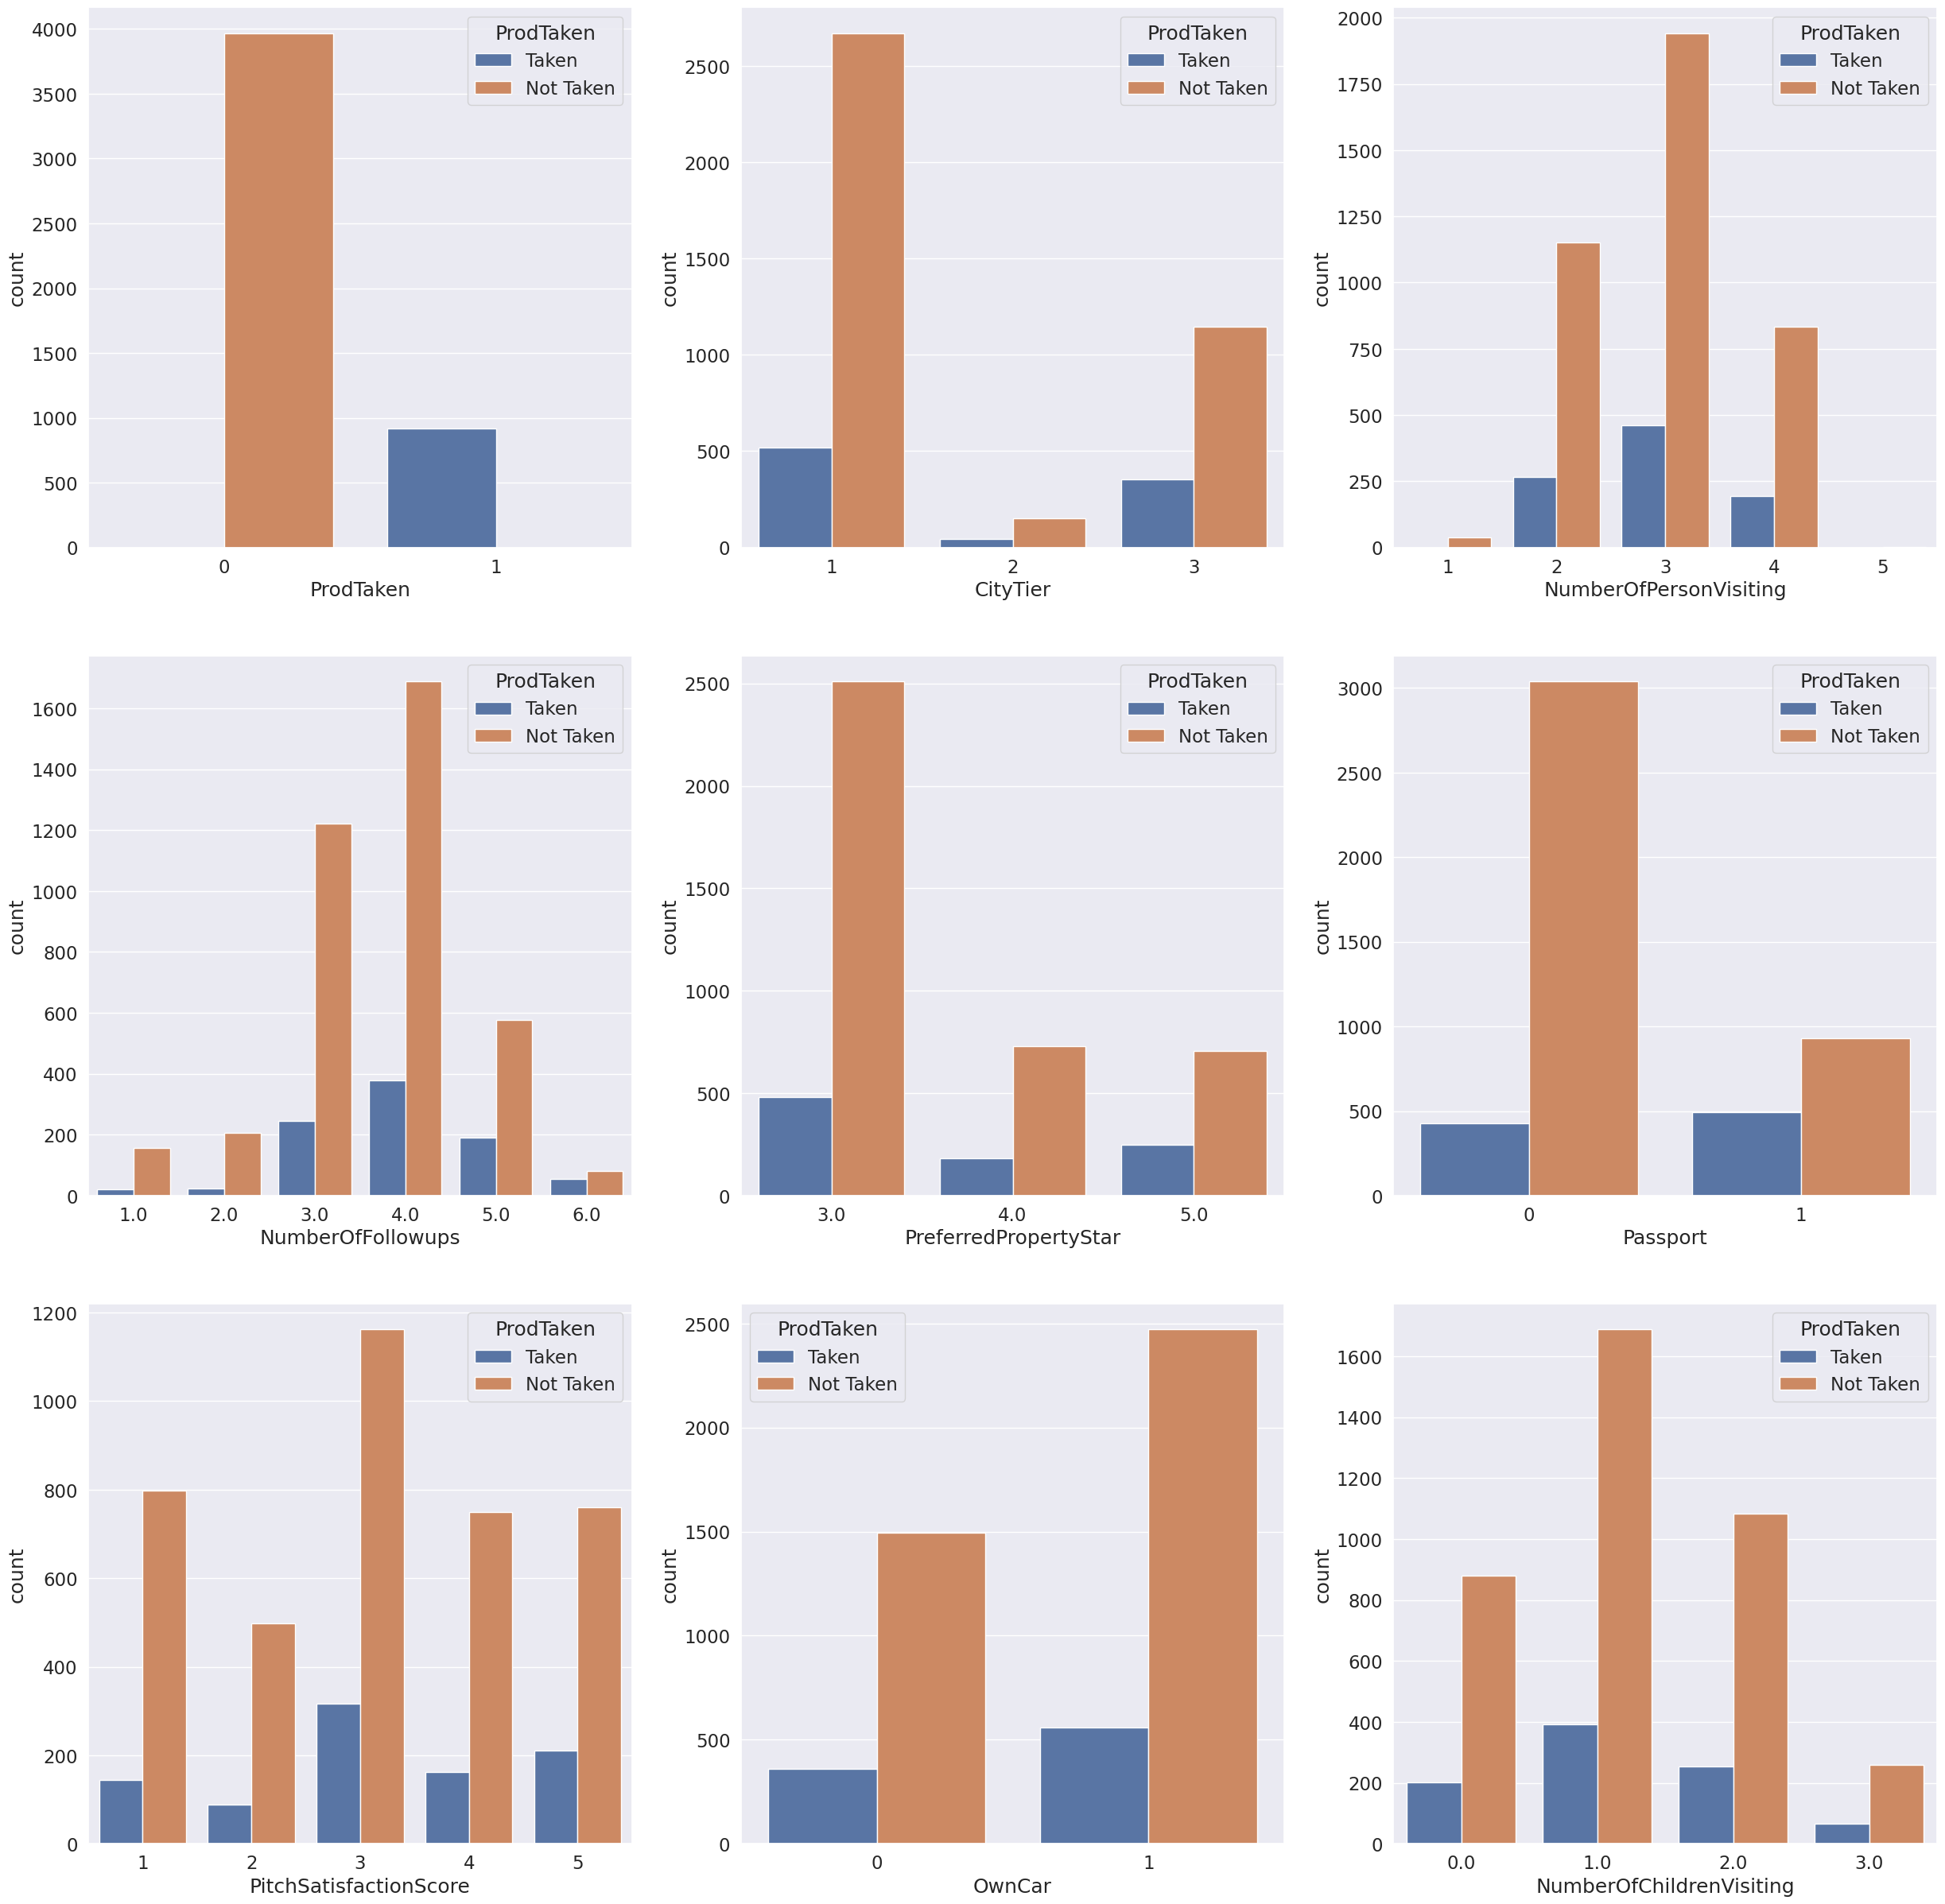

In [41]:
fig, ax = plt.subplots(3,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in num_categorical_df: 
    sns.countplot(x=num_categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()